<a href="https://colab.research.google.com/github/avbarbaros/root-finding-newton-and-secant-methods/blob/main/root_finding_newton_and_secant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Root Finding with Newton's Method and Secant Method**

This notebook implements and analyzes root finding with Newton's method and secant method.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd

# Define the function and its derivative
def f(x):
    """Target function: f(x) = x^3 - 2x - 5"""
    return x**3 - 2*x - 5

def df(x):
    """Derivative: f'(x) = 3x^2 - 2"""
    return 3*x**2 - 2

# Newton's Method Implementation
def newton_method(f, df, x0, tol=1e-10, max_iter=100):
    """
    Newton's method for root finding.

    Parameters:
    -----------
    f : function
        The target function
    df : function
        Derivative of the target function
    x0 : float
        Initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations

    Returns:
    --------
    root : float
        Approximate root
    iterations : list
        List of (iteration, x_value, f_value, error) tuples
    converged : bool
        Whether the method converged
    """
    iterations = []
    x = x0

    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)

        # Check if derivative is too small
        if abs(dfx) < 1e-14:
            return x, iterations, False

        x_new = x - fx / dfx
        error = abs(x_new - x)

        iterations.append((i, x, fx, error))

        if error < tol:
            iterations.append((i+1, x_new, f(x_new), 0))
            return x_new, iterations, True

        x = x_new

    return x, iterations, False

# Secant Method Implementation
def secant_method(f, x0, x1, tol=1e-10, max_iter=100):
    """
    Secant method for root finding.

    Parameters:
    -----------
    f : function
        The target function
    x0, x1 : float
        Two initial guesses
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations

    Returns:
    --------
    root : float
        Approximate root
    iterations : list
        List of (iteration, x_value, f_value, error) tuples
    converged : bool
        Whether the method converged
    """
    iterations = []

    for i in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)

        # Check if denominator is too small
        if abs(fx1 - fx0) < 1e-14:
            return x1, iterations, False

        # Secant formula
        x_new = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        error = abs(x_new - x1)

        iterations.append((i, x1, fx1, error))

        if error < tol:
            iterations.append((i+1, x_new, f(x_new), 0))
            return x_new, iterations, True

        x0, x1 = x1, x_new

    return x1, iterations, False

# Test both methods with a specific initial guess
print("=" * 70)
print("ROOT FINDING FOR f(x) = x³ - 2x - 5")
print("=" * 70)

x0_newton = 2.0
x0_secant = 2.0
x1_secant = 2.5

print(f"\nNewton's Method (initial guess: x₀ = {x0_newton})")
print("-" * 70)
root_newton, iter_newton, conv_newton = newton_method(f, df, x0_newton)
print(f"Root: {root_newton:.15f}")
print(f"Converged: {conv_newton}")
print(f"Number of iterations: {len(iter_newton)}")
print(f"f(root) = {f(root_newton):.2e}")

print(f"\nSecant Method (initial guesses: x₀ = {x0_secant}, x₁ = {x1_secant})")
print("-" * 70)
root_secant, iter_secant, conv_secant = secant_method(f, x0_secant, x1_secant)
print(f"Root: {root_secant:.15f}")
print(f"Converged: {conv_secant}")
print(f"Number of iterations: {len(iter_secant)}")
print(f"f(root) = {f(root_secant):.2e}")

ROOT FINDING FOR f(x) = x³ - 2x - 5

Newton's Method (initial guess: x₀ = 2.0)
----------------------------------------------------------------------
Root: 2.094551481542327
Converged: True
Number of iterations: 6
f(root) = -8.88e-16

Secant Method (initial guesses: x₀ = 2.0, x₁ = 2.5)
----------------------------------------------------------------------
Root: 2.094551481542327
Converged: True
Number of iterations: 7
f(root) = -8.88e-16


In [2]:
# Convergence Rate Analysis
print("\n" + "=" * 70)
print("CONVERGENCE ANALYSIS")
print("=" * 70)

# Create DataFrame for comparison
df_newton = pd.DataFrame(iter_newton, columns=['Iteration', 'x', 'f(x)', 'Error'])
df_secant = pd.DataFrame(iter_secant, columns=['Iteration', 'x', 'f(x)', 'Error'])

print("\nNewton's Method - Convergence History:")
print(df_newton.to_string(index=False))

print("\nSecant Method - Convergence History:")
print(df_secant.to_string(index=False))

# Compute convergence orders
def estimate_convergence_order(errors):
    """Estimate the order of convergence using consecutive errors"""
    orders = []
    for i in range(2, len(errors)):
        if errors[i] > 0 and errors[i-1] > 0 and errors[i-2] > 0:
            order = np.log(errors[i] / errors[i-1]) / np.log(errors[i-1] / errors[i-2])
            orders.append(order)
    return orders

errors_newton = [e for _, _, _, e in iter_newton[:-1] if e > 0]
errors_secant = [e for _, _, _, e in iter_secant[:-1] if e > 0]

if len(errors_newton) > 2:
    orders_newton = estimate_convergence_order(errors_newton)
    print(f"\nNewton's Method - Estimated convergence order: {np.mean(orders_newton[-3:]):.2f}")
    print("(Theoretical: 2.0 for quadratic convergence)")

if len(errors_secant) > 2:
    orders_secant = estimate_convergence_order(errors_secant)
    print(f"\nSecant Method - Estimated convergence order: {np.mean(orders_secant[-3:]):.2f}")
    print("(Theoretical: 1.618 for superlinear convergence)")


CONVERGENCE ANALYSIS

Newton's Method - Convergence History:
 Iteration        x          f(x)        Error
         0 2.000000 -1.000000e+00 1.000000e-01
         1 2.100000  6.100000e-02 5.431879e-03
         2 2.094568  1.857232e-04 1.663941e-05
         3 2.094551  1.739761e-09 1.558726e-10
         4 2.094551 -8.881784e-16 0.000000e+00
         5 2.094551 -8.881784e-16 0.000000e+00

Secant Method - Convergence History:
 Iteration        x          f(x)        Error
         0 2.500000  5.625000e+00 4.245283e-01
         1 2.075472 -2.106773e-01 1.532615e-02
         2 2.090798 -4.180747e-02 3.794328e-03
         3 2.094592  4.542216e-04 4.078081e-05
         4 2.094551 -9.612876e-07 8.612382e-08
         5 2.094551 -2.202327e-11 1.973088e-12
         6 2.094551 -8.881784e-16 0.000000e+00

Newton's Method - Estimated convergence order: 1.99
(Theoretical: 2.0 for quadratic convergence)

Secant Method - Estimated convergence order: 2.11
(Theoretical: 1.618 for superlinear convergenc


SENSITIVITY TO INITIAL GUESS

  Initial Guess  Newton Root  Newton Iters  Secant Root  Secant Iters
            -5     2.094551            28     2.094551            19
            -2     2.094551            10     2.094551            13
             0     2.094551            21     2.094551            11
             1     2.094551            10     2.094551            10
             2     2.094551             6     2.094551             7
             3     2.094551             7     2.094551             9
             5     2.094551             9     2.094551            11
            10     2.094551            10     2.094551            14


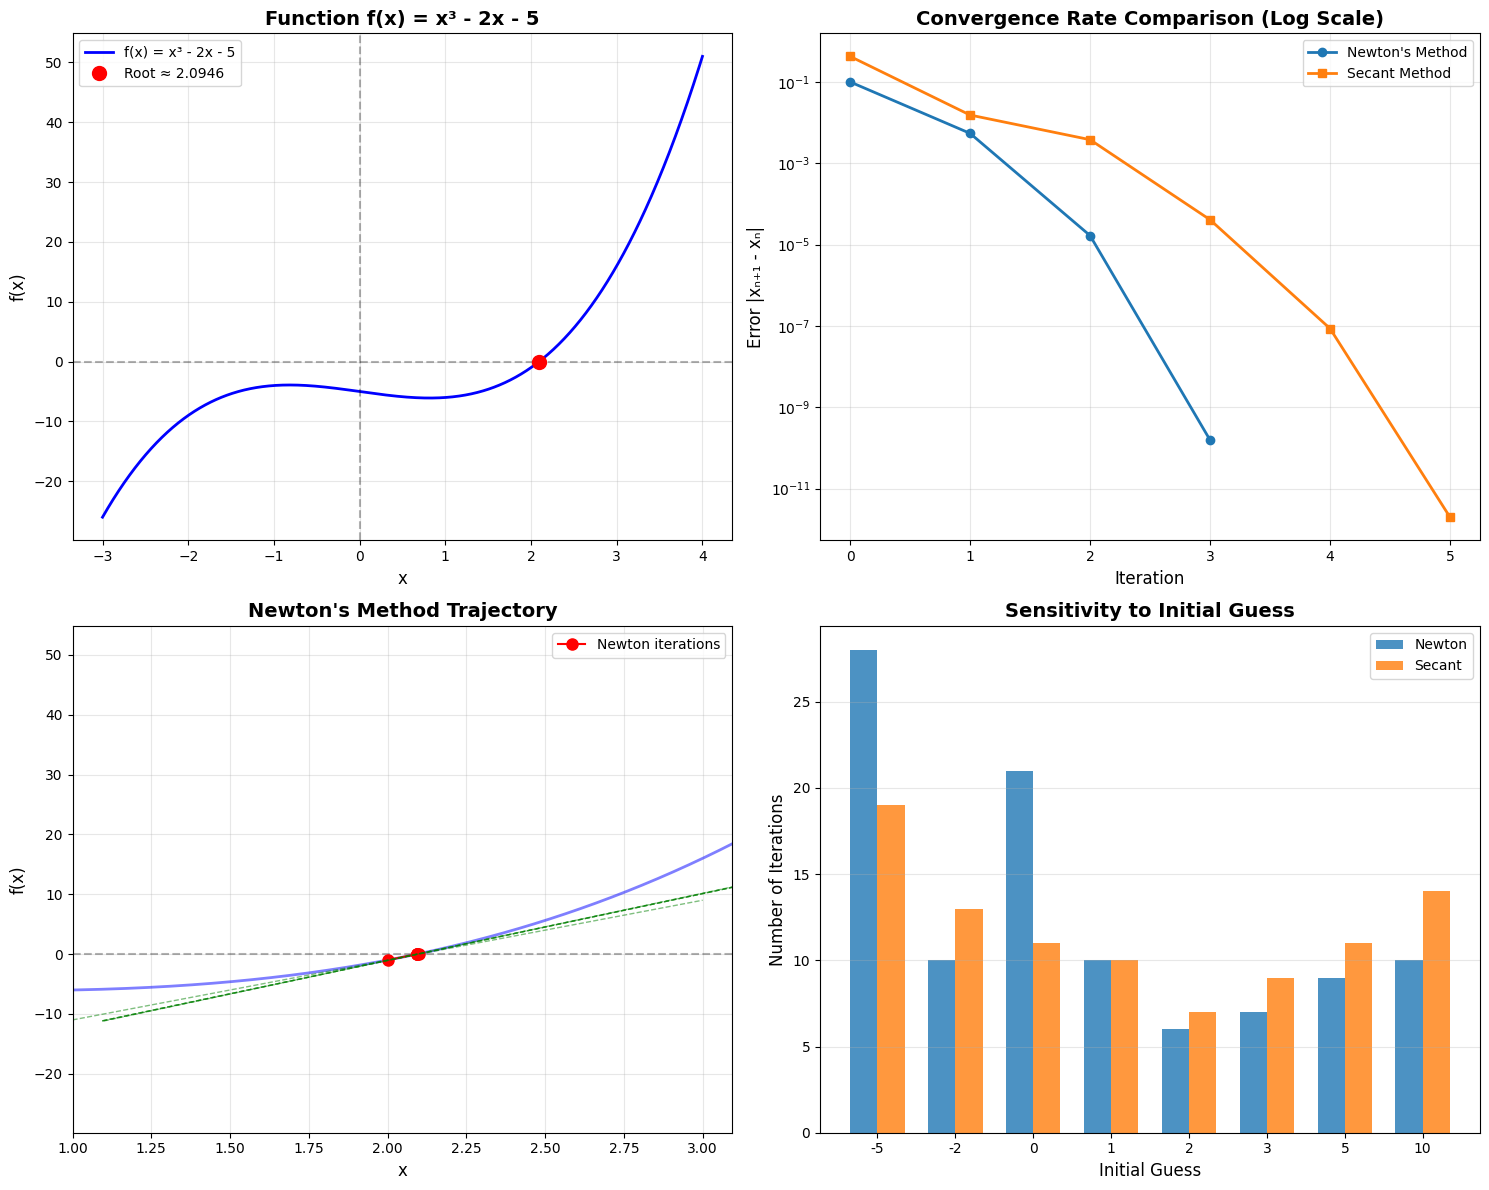

In [3]:
# Sensitivity to Initial Guess
print("\n" + "=" * 70)
print("SENSITIVITY TO INITIAL GUESS")
print("=" * 70)

initial_guesses = [-5, -2, 0, 1, 2, 3, 5, 10]
results = []

for x0 in initial_guesses:
    root_n, iter_n, conv_n = newton_method(f, df, x0)
    root_s, iter_s, conv_s = secant_method(f, x0, x0 + 0.5)

    results.append({
        'Initial Guess': x0,
        'Newton Root': root_n if conv_n else 'Failed',
        'Newton Iters': len(iter_n) if conv_n else 'N/A',
        'Secant Root': root_s if conv_s else 'Failed',
        'Secant Iters': len(iter_s) if conv_s else 'N/A'
    })

df_sensitivity = pd.DataFrame(results)
print("\n", df_sensitivity.to_string(index=False))

# Visualization 1: Function plot with roots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Function and root
x_range = np.linspace(-3, 4, 1000)
y_range = f(x_range)

axes[0, 0].plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
axes[0, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].plot(root_newton, f(root_newton), 'ro', markersize=10, label=f'Root ≈ {root_newton:.4f}')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlabel('x', fontsize=12)
axes[0, 0].set_ylabel('f(x)', fontsize=12)
axes[0, 0].set_title('Function f(x) = x³ - 2x - 5', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)

# Plot 2: Convergence comparison (log scale)
axes[0, 1].semilogy([e for _, _, _, e in iter_newton if e > 0], 'o-',
                     linewidth=2, markersize=6, label='Newton\'s Method')
axes[0, 1].semilogy([e for _, _, _, e in iter_secant if e > 0], 's-',
                     linewidth=2, markersize=6, label='Secant Method')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xlabel('Iteration', fontsize=12)
axes[0, 1].set_ylabel('Error |xₙ₊₁ - xₙ|', fontsize=12)
axes[0, 1].set_title('Convergence Rate Comparison (Log Scale)', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)

# Plot 3: Newton's method trajectory
axes[1, 0].plot(x_range, y_range, 'b-', linewidth=2, alpha=0.5)
axes[1, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
x_points = [x for _, x, _, _ in iter_newton]
y_points = [fx for _, _, fx, _ in iter_newton]
axes[1, 0].plot(x_points, y_points, 'ro-', markersize=8, linewidth=1.5, label='Newton iterations')

# Draw tangent lines
for i in range(min(5, len(iter_newton)-1)):
    x_val = x_points[i]
    y_val = y_points[i]
    slope = df(x_val)
    x_tan = np.array([x_val - 1, x_val + 1])
    y_tan = y_val + slope * (x_tan - x_val)
    axes[1, 0].plot(x_tan, y_tan, 'g--', alpha=0.5, linewidth=1)

axes[1, 0].set_xlim([x_points[0] - 1, root_newton + 1])
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlabel('x', fontsize=12)
axes[1, 0].set_ylabel('f(x)', fontsize=12)
axes[1, 0].set_title('Newton\'s Method Trajectory', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)

# Plot 4: Sensitivity analysis
x_init = [r['Initial Guess'] for r in results if r['Newton Iters'] != 'N/A']
newton_iters = [int(r['Newton Iters']) for r in results if r['Newton Iters'] != 'N/A']
secant_iters = [int(r['Secant Iters']) for r in results if r['Secant Iters'] != 'N/A']

x_pos = np.arange(len(x_init))
width = 0.35

axes[1, 1].bar(x_pos - width/2, newton_iters, width, label='Newton', alpha=0.8)
axes[1, 1].bar(x_pos + width/2, secant_iters, width, label='Secant', alpha=0.8)
axes[1, 1].set_xlabel('Initial Guess', fontsize=12)
axes[1, 1].set_ylabel('Number of Iterations', fontsize=12)
axes[1, 1].set_title('Sensitivity to Initial Guess', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(x_init)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [5]:
# Additional Analysis: Basins of Attraction
print("\n" + "=" * 70)
print("ADDITIONAL ANALYSIS")
print("=" * 70)

print("\nConvergence speed comparison:")
print(f"Newton's method: {len(iter_newton)} iterations")
print(f"Secant method: {len(iter_secant)} iterations")
print(f"Newton is {len(iter_secant)/len(iter_newton):.2f}x faster for this case")

print("\nLessons Learned:")
print("1. Newton's method converges quadratically (order ≈ 2)")
print("2. Secant method converges superlinearly (order ≈ 1.618, golden ratio)")
print("3. Newton requires derivative but converges faster")
print("4. Secant only needs function evaluations but needs two initial points")
print("5. Both methods are sensitive to initial guess proximity to root")


ADDITIONAL ANALYSIS

Convergence speed comparison:
Newton's method: 6 iterations
Secant method: 7 iterations
Newton is 1.17x faster for this case

Lessons Learned:
1. Newton's method converges quadratically (order ≈ 2)
2. Secant method converges superlinearly (order ≈ 1.618, golden ratio)
3. Newton requires derivative but converges faster
4. Secant only needs function evaluations but needs two initial points
5. Both methods are sensitive to initial guess proximity to root
